In [4]:
import sys
sys.path.append('../coding')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from analysis.information import AdaptationChannel
from analysis.plotting import pmf_plot

publication_directory = '../manuscript'

res_df = pd.read_pickle('../data/transition_rates.pkl')

efficiencies = {}

for ix, sub_df in res_df.groupby(level=[0,1,2]):
    if ix[2] == 'RS':
        channel = AdaptationChannel(sub_df.loc[ix])
        efficiencies[ix] = channel.obtain_efficiency(method='jimbo')
        print(ix)


efficiencies = pd.Series(efficiencies)

C:\Users\Administrator\iCloudDrive\Documents\skola\doktorat\ms-thesis\program\optimization\__init__.py:7: RuntimeWarning: invalid value encountered in true_divide
  specificity = sr_grid / prior


(0.0, 250, 'RS')
(0.0, 500, 'RS')
(0.0, 750, 'RS')
(0.0, 1000, 'RS')
(0.2, 250, 'RS')
(0.2, 500, 'RS')
(0.2, 750, 'RS')
(0.2, 1000, 'RS')
(0.4, 250, 'RS')
(0.4, 500, 'RS')
(0.4, 750, 'RS')
(0.4, 1000, 'RS')
(0.6, 250, 'RS')
(0.6, 500, 'RS')
(0.6, 750, 'RS')
(0.6, 1000, 'RS')
(0.8, 250, 'RS')
(0.8, 500, 'RS')
(0.8, 750, 'RS')
(0.8, 1000, 'RS')
(1.0, 250, 'RS')
(1.0, 500, 'RS')
(1.0, 750, 'RS')
(1.0, 1000, 'RS')


In [5]:
efficiencies_nonadapt = {}

for ix, sub_df in res_df.groupby(level=[0,1,2]):
    if ix[2] == 'RS':
        channel = AdaptationChannel(sub_df.loc[ix])
        efficiencies_nonadapt[ix] = channel.obtain_efficiency(method='jimbo', n_iter=1)
        print(ix)

efficiencies_nonadapt = pd.Series(efficiencies_nonadapt)

C:\Users\Administrator\iCloudDrive\Documents\skola\doktorat\ms-thesis\program\optimization\__init__.py:7: RuntimeWarning: invalid value encountered in true_divide
  specificity = sr_grid / prior


(0.0, 250, 'RS')
(0.0, 500, 'RS')
(0.0, 750, 'RS')
(0.0, 1000, 'RS')
(0.2, 250, 'RS')
(0.2, 500, 'RS')
(0.2, 750, 'RS')
(0.2, 1000, 'RS')
(0.4, 250, 'RS')
(0.4, 500, 'RS')
(0.4, 750, 'RS')
(0.4, 1000, 'RS')
(0.6, 250, 'RS')
(0.6, 500, 'RS')
(0.6, 750, 'RS')
(0.6, 1000, 'RS')
(0.8, 250, 'RS')
(0.8, 500, 'RS')
(0.8, 750, 'RS')
(0.8, 1000, 'RS')
(1.0, 250, 'RS')
(1.0, 500, 'RS')
(1.0, 750, 'RS')
(1.0, 1000, 'RS')


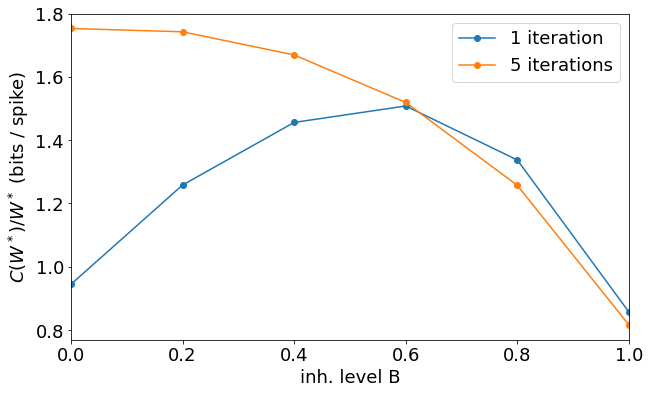

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

efficiencies_nonadapt.map(lambda x: x['fun']).swaplevel(0,1).loc[500].swaplevel(0,1)['RS'].plot(ax=ax, marker='o', label='1 iteration')
efficiencies.map(lambda x: x['fun']).swaplevel(0,1).loc[500].swaplevel(0,1)['RS'].plot(ax=ax, marker='o', label='5 iterations')
ax.legend()
ax.set_ylabel(r'$C(W^*)/W^*$ (bits / spike)')
ax.set_xlabel('inh. level B')

plt.savefig(f'{publication_directory}/img/adapt_necessity.pdf', bbox_inches='tight')